In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip /content/NEU-DET_roboflow.zip -d /content/NEU-DET/


Streaming output truncated to the last 5000 lines.
  inflating: /content/NEU-DET/NEU-DET_roboflow/content/NEU-DET/train/images/scratches_153_jpg.rf.8253e13822ec248d23c2e040cee50f58.jpg  
  inflating: /content/NEU-DET/NEU-DET_roboflow/content/NEU-DET/train/images/scratches_153_jpg.rf.ece3f7abf610d66da64664ba6da9941a.jpg  
  inflating: /content/NEU-DET/NEU-DET_roboflow/content/NEU-DET/train/images/scratches_154_jpg.rf.4258b4fef3c39a811410be8ba28ab6c1.jpg  
  inflating: /content/NEU-DET/NEU-DET_roboflow/content/NEU-DET/train/images/scratches_154_jpg.rf.63d702f0b434b33ea9518b4e769367ea.jpg  
  inflating: /content/NEU-DET/NEU-DET_roboflow/content/NEU-DET/train/images/scratches_154_jpg.rf.bae8e082aa8a79f52dbde5cbf4c1f14a.jpg  
  inflating: /content/NEU-DET/NEU-DET_roboflow/content/NEU-DET/train/images/scratches_155_jpg.rf.04c1a651505671a055a7d27725eb5713.jpg  
  inflating: /content/NEU-DET/NEU-DET_roboflow/content/NEU-DET/train/images/scratches_155_jpg.rf.c81f23e2f29567b2be2052c678935633.jpg

In [ ]:
pip install opencv-python


In [ ]:
import os

IMAGE_DIR = "NEU-DET/train/images"

# List images with extensions .jpg, .jpeg, .png (case insensitive)
image_files = [f for f in os.listdir(IMAGE_DIR)
               if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print("Number of training images:", len(image_files))


Number of training images: 3760


In [ ]:
%cd /content/drive/MyDrive/yolov5

%pip install -qr requirements.txt  # install
# %cd yolov5
# import torch
# from yolov5 import utils
# display = utils.notebook_init()  # checks


/content/drive/MyDrive/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 61.4 MB/s eta 0:00:00


In [ ]:
!pip install protobuf>=4.25.0
import os
os.environ['WANDB_MODE'] = 'disabled'

In [ ]:
!pip install opencv-python matplotlib


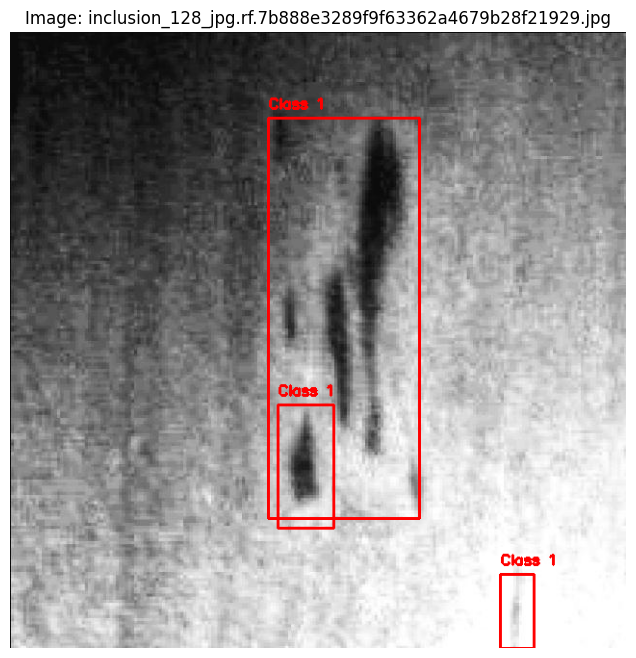

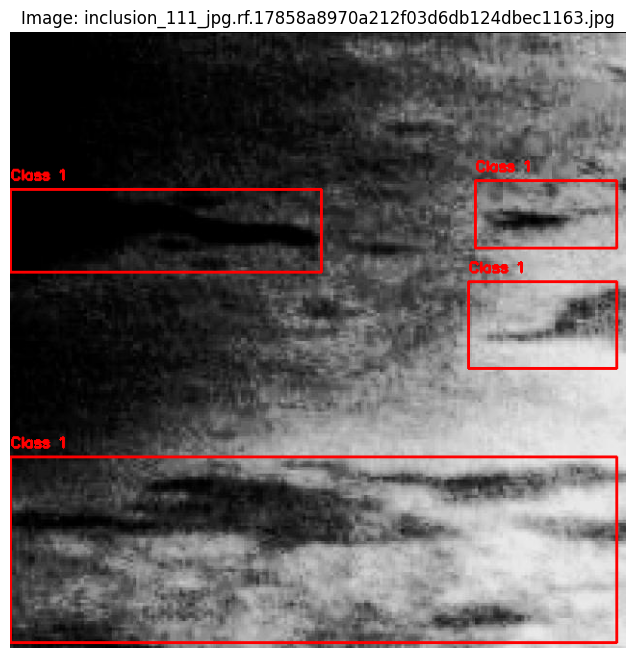

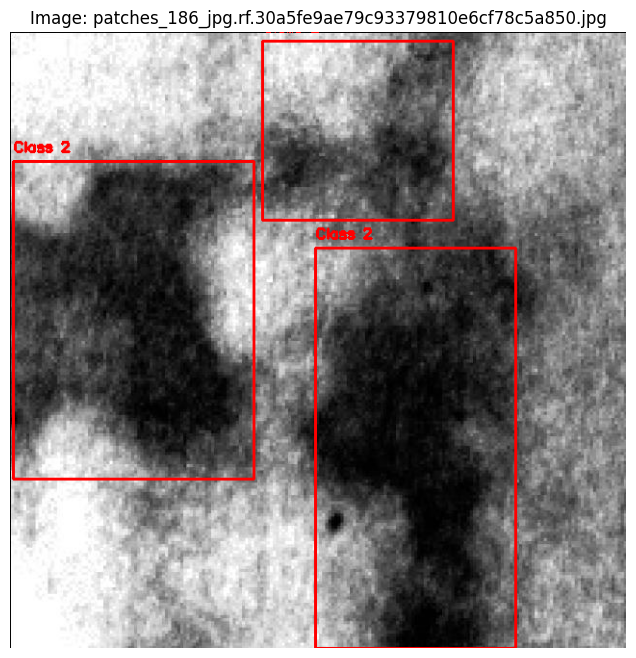

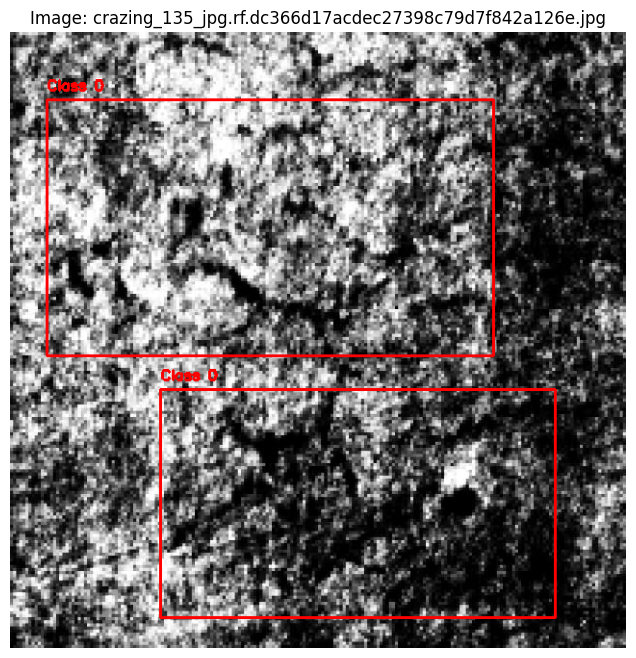

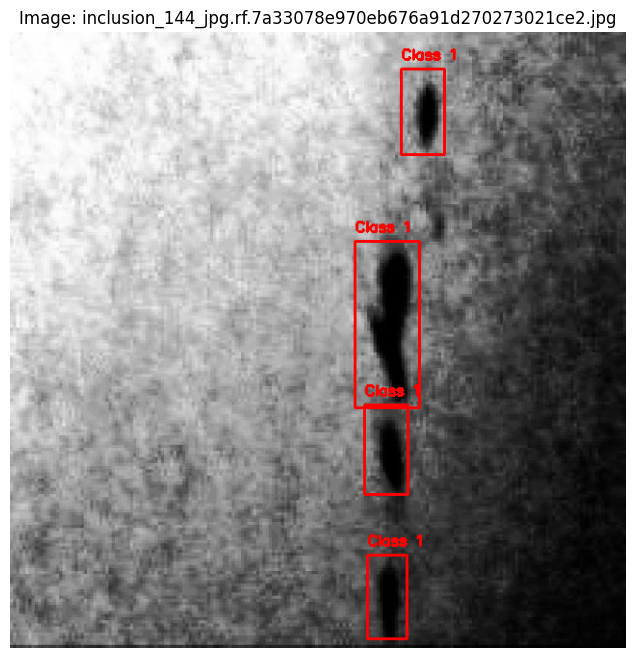

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Define paths
images_path = "/content/NEU-DET2/train/images"
labels_path = "/content/NEU-DET2/train/labels"

# Function to draw bounding boxes
def draw_bounding_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape

    # Read the label file
    with open(label_path, "r") as file:
        labels = file.readlines()

    # Draw each bounding box
    for label in labels:
        data = label.strip().split()
        class_id, x_center, y_center, box_width, box_height = map(float, data)

        # Convert YOLO format to corner coordinates
        x1 = int((x_center - box_width / 2) * width)
        y1 = int((y_center - box_height / 2) * height)
        x2 = int((x_center + box_width / 2) * width)
        y2 = int((y_center + box_height / 2) * height)

        # Draw rectangle and label
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(image, f"Class {int(class_id)}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return image

# Visualize a few images with labels
sample_images = os.listdir(images_path)[:5]  # Change the number to view more images
for image_file in sample_images:
    image_path = os.path.join(images_path, image_file)
    label_file = image_file.replace(".jpg", ".txt")  # Adjust extension if needed
    label_path = os.path.join(labels_path, label_file)

    if os.path.exists(label_path):  # Ensure label file exists
        annotated_image = draw_bounding_boxes(image_path, label_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(annotated_image)
        plt.axis("off")
        plt.title(f"Image: {image_file}")
        plt.show()


In [ ]:
!cp -r /content/drive/MyDrive/datasets/NEU-DET /content/


## Attempt with backbone modification using CBAM (Convolutional Block Attention Module)

In [ ]:
!python /content/drive/MyDrive/yolov5/train.py --img 640 --batch 16 --epochs 50 --data neu-det.yaml --cfg /content/drive/MyDrive/yolov5/models/yolov5s_cbam.yaml --weights yolov5s.pt --cache


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-02-11 19:23:20.922056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739301800.960278   19787 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739301800.971109   19787 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=/content/drive/MyDrive/yolov5/models/yolov5s_cbam.yaml, data=neu-det.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=No

In [ ]:
##Training with modified dataset

# This is sofar good!

In [ ]:
!python /content/drive/MyDrive/yolov5/train.py --img 320 --batch 16 --epochs 50 --data neu-det.yaml --weights yolov5s.pt --cache

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      39/49      1.21G     0.0344    0.02606  0.0008333         70        320:  51% 121/235 [00:17<00:15,  7.46it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      39/49      1.21G     0.0344    0.02605  0.0008361         61        320:  52% 122/235 [00:17<00:16,  6.99it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      39/49      1.21G    0.03445     0.0261  0.0008349         91        320:  52% 123/235 [00:17<00:17,  6.54it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)

In [ ]:
!unzip /content/neu-det.zip -d /content/NEU-DET

Streaming output truncated to the last 5000 lines.
 extracting: /content/NEU-DET/train/images/scratches_159_jpg.rf.c85496888dc934bf12d1de179e2f017f.jpg  
 extracting: /content/NEU-DET/train/images/scratches_15_jpg.rf.1c738730f1d20f1143a9026cf5868f12.jpg  
 extracting: /content/NEU-DET/train/images/scratches_15_jpg.rf.520d3544bb2ae871d827c69fac8acece.jpg  
 extracting: /content/NEU-DET/train/images/scratches_15_jpg.rf.c06ca6409cfa31ed4fb0b6d7e96d12ae.jpg  
 extracting: /content/NEU-DET/train/images/scratches_160_jpg.rf.18461cca1f72342ca1406db7a7355ecc.jpg  
 extracting: /content/NEU-DET/train/images/scratches_160_jpg.rf.9bdaf88f8743d3363aa3315bf5af1c31.jpg  
 extracting: /content/NEU-DET/train/images/scratches_160_jpg.rf.a78961d20b21e28a729ec09dca01513c.jpg  
 extracting: /content/NEU-DET/train/images/scratches_161_jpg.rf.8aeca3c1d8f5a2b95c5940accfb37dbc.jpg  
 extracting: /content/NEU-DET/train/images/scratches_161_jpg.rf.8ec4c376ac28036a227b2ffe79b0ca8c.jpg  
 extracting: /content/NEU

In [ ]:
from google.colab import files
files.download('/content/predicted_images.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip /content/drive/MyDrive/NEU-DETv1.zip -d /content/NEU-DET

Streaming output truncated to the last 5000 lines.
 extracting: /content/NEU-DET/train/images/scratches_153_jpg.rf.8253e13822ec248d23c2e040cee50f58.jpg  
 extracting: /content/NEU-DET/train/images/scratches_153_jpg.rf.ece3f7abf610d66da64664ba6da9941a.jpg  
 extracting: /content/NEU-DET/train/images/scratches_154_jpg.rf.4258b4fef3c39a811410be8ba28ab6c1.jpg  
 extracting: /content/NEU-DET/train/images/scratches_154_jpg.rf.63d702f0b434b33ea9518b4e769367ea.jpg  
 extracting: /content/NEU-DET/train/images/scratches_154_jpg.rf.bae8e082aa8a79f52dbde5cbf4c1f14a.jpg  
 extracting: /content/NEU-DET/train/images/scratches_155_jpg.rf.04c1a651505671a055a7d27725eb5713.jpg  
 extracting: /content/NEU-DET/train/images/scratches_155_jpg.rf.c81f23e2f29567b2be2052c678935633.jpg  
 extracting: /content/NEU-DET/train/images/scratches_156_jpg.rf.5da007b8f54898103fc6ea5379cb94c7.jpg  
 extracting: /content/NEU-DET/train/images/scratches_156_jpg.rf.64d0bb72b85c56d4e4f8c8a53afc2ade.jpg  
 extracting: /content/

##attempt to fuse yolo + annomaly detection module

In [ ]:
!unzip /content/non-defect.zip -d /content/Non-defect

!unzip /content/steeldefectannomallytest2.zip -d /content/test

Archive:  /content/steeldefectannomallytest2.zip
   creating: /content/test/steeldefectannomallytest2/
  inflating: /content/test/steeldefectannomallytest2/044700866_06_01_04_15.jpg  
  inflating: /content/test/steeldefectannomallytest2/060964105_06_01_02_00.jpg  
  inflating: /content/test/steeldefectannomallytest2/09757b84e_01_01_03_00.jpg  
  inflating: /content/test/steeldefectannomallytest2/09757b84e_02_01_03_00.jpg  
  inflating: /content/test/steeldefectannomallytest2/09757b84e_04_01_03_00.jpg  
  inflating: /content/test/steeldefectannomallytest2/101648543_04_01_02_20.jpg  
  inflating: /content/test/steeldefectannomallytest2/101648543_05_01_02_05.jpg  
  inflating: /content/test/steeldefectannomallytest2/101648543_06_01_02_05.jpg  
  inflating: /content/test/steeldefectannomallytest2/2e2f5467c_04_01_03_00.jpg  
  inflating: /content/test/steeldefectannomallytest2/6fa9e1d65_01_01_04_10.jpg  
  inflating: /content/test/steeldefectannomallytest2/6fa9e1d65_03_01_04_10.jpg  
  infl

In [ ]:
!pip install numpy==1.23.5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 98.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but y

In [ ]:

!curl -L https://github.com/gathierry/FastFlow/archive/refs/heads/master.zip -o fastflow_new.zip

!unzip fastflow_new.zip

%cd FastFlow-master

!sed -i 's/torch==1\.9\.1/torch==2.0.0/g' requirements.txt

!sed -i 's/scikit-learn==0\.24\.2/scikit-learn==1.2.2/g' requirements.txt

!grep "torch==" requirements.txt
!grep "torchvision==" requirements.txt

!pip install -r requirements.txt

import sys
sys.path.append("/content/FastFlow-master")


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 12439    0 12439    0     0  20451      0 --:--:-- --:--:-- --:--:-- 54797
Archive:  fastflow_new.zip
2cf1f2f4c562a7f13cfb1959e3afe5df2f2d2565
   creating: FastFlow-master/
 extracting: FastFlow-master/.gitignore  
  inflating: FastFlow-master/LICENSE  
  inflating: FastFlow-master/README.md  
   creating: FastFlow-master/configs/
  inflating: FastFlow-master/configs/cait.yaml  
  inflating: FastFlow-master/configs/deit.yaml  
  inflating: FastFlow-master/configs/resnet18.yaml  
  inflating: FastFlow-master/configs/wide_resnet50_2.yaml  
  inflating: FastFlow-master/constants.py  
  inflating: FastFlow-master/dataset.py  
  inflating: FastFlow-master/fastflow.py  
  inflating: FastFlow-master/main.py  
  inflating: FastFlow-master/requirements.txt  

In [ ]:
!sed -i 's/torch==1\.9\.1/torch==2.0.0/g' requirements.txt
!sed -i 's/torchvision==0\.10\.1/torchvision==0.15.1/g' requirements.txt
!sed -i 's/scikit-learn==0\.24\.2/scikit-learn==1.2.2/g' requirements.txt
!grep "torch==" requirements.txt
!grep "torchvision==" requirements.txt
!pip install -r requirements.txt

torch==2.0.0
torchvision==0.15.1
  Using cached FrEIA-0.2-py3-none-any.whl


In [ ]:

import sys
sys.path.append("/content/FastFlow-master")

In [ ]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
import sys

In [ ]:

# Load FastFlow Anomaly Detection Model

sys.path.append("/content/FastFlow-master")
from fastflow import FastFlow

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
anomaly_model = FastFlow(backbone_name="resnet18", flow_steps=4, input_size=256)
anomaly_model.load_state_dict(torch.load("/content/fastflow_model_v2100epochs.pth", map_location=device))
anomaly_model.to(device)
anomaly_model.eval()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


FastFlow(
  (feature_extractor): FeatureListNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm

In [ ]:
import os
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
import sys
from matplotlib.lines import Line2D

%matplotlib inline

# --------------------------
# 1. Load YOLOv5s Model with Custom Weights
# --------------------------
custom_weights = "/content/drive/MyDrive/yolov5/runs/train/exp/weights/best.pt"
yolo_model = torch.hub.load('/content/drive/MyDrive/yolov5', 'custom',
                              path=custom_weights,
                              source='local')
yolo_model.eval()

# --------------------------
# 2. Load FastFlow Anomaly Detection Model
# --------------------------
sys.path.append("/content/FastFlow-master")
from fastflow import FastFlow

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
anomaly_model = FastFlow(backbone_name="resnet18", flow_steps=4, input_size=256)
anomaly_model.load_state_dict(torch.load("/content/best_fastflow.pth", map_location=device))
anomaly_model.to(device)
anomaly_model.eval()

# --------------------------
# 3. Define Utility Function: Compute IoU
# --------------------------
def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area1 + area2 - inter_area + 1e-6
    return inter_area / union

# --------------------------
# 4. Define Preprocessing Transform for Anomaly Detection
# --------------------------
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256,256)),
    transforms.ToTensor()
])

# --------------------------
# 5. Process All Images in the Folder
# --------------------------
# test_folder = "/content/Non-defect/test/images"
test_folder = "/content/test/steeldefectannomallytest2"
test_images = [os.path.join(test_folder, f) for f in os.listdir(test_folder)
               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

print("Found {} images:".format(len(test_images)))
for img_path in test_images:
    print(img_path)

# For debugging, process only the first 20 images
max_images = 20

# Set YOLO confidence threshold to filter out low-confidence detections
confidence_threshold = 0.5
iou_threshold = 0.5

for idx, img_path in enumerate(test_images):
    if idx >= max_images:
        break
    print("Processing image:", img_path)

    # Load image (BGR) and convert to RGB.
    img = cv2.imread(img_path)
    if img is None:
        print("Unable to read image:", img_path)
        continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # --------------------------
    # 6. Run YOLOv5 Inference for Known Defects
    # --------------------------
    results = yolo_model(img_rgb)
    yolo_df = results.pandas().xyxy[0]
    yolo_df = yolo_df[yolo_df['confidence'] >= confidence_threshold]
    yolo_boxes = []
    yolo_labels = []
    for _, row in yolo_df.iterrows():
        box = [int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])]
        label = row['name']
        yolo_boxes.append(box)
        yolo_labels.append(label)
    print("YOLO detected {} boxes".format(len(yolo_boxes)))

    # --------------------------
    # 7. Run Anomaly Detection (FastFlow)
    # --------------------------
    img_for_anom = transform(img_rgb).unsqueeze(0).to(device)
    with torch.no_grad():
        ret = anomaly_model(img_for_anom)
        anomaly_map = ret["anomaly_map"]
    anom_map = anomaly_map.cpu().numpy()[0,0]
    anom_map_resized = cv2.resize(anom_map, (img.shape[1], img.shape[0]))
    anom_map_norm = cv2.normalize(anom_map_resized, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # --------------------------
    # 8. Correct Heatmap Logic: Invert anomaly map so defects appear red.
    # --------------------------
    anom_map_inverted = 255 - anom_map_norm
    anom_map_color = cv2.applyColorMap(anom_map_inverted, cv2.COLORMAP_JET)

    # --------------------------
    # 9. Post-process Anomaly Map to Extract Bounding Boxes
    # --------------------------
    thresh_value = 150  # Adjust as needed
    _, binary_map = cv2.threshold(anom_map_norm, thresh_value, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5), np.uint8)
    binary_map = cv2.morphologyEx(binary_map, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    anomaly_boxes = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        anomaly_boxes.append([x, y, x+w, y+h])


    def non_max_suppression(boxes, iou_thresh=0.3):
        if not boxes:
            return []
        boxes = sorted(boxes, key=lambda b: (b[2]-b[0]) * (b[3]-b[1]), reverse=True)
        keep = []
        while boxes:
            current = boxes.pop(0)
            keep.append(current)
            boxes = [b for b in boxes if compute_iou(current, b) < iou_thresh]
        return keep

    anomaly_boxes = non_max_suppression(anomaly_boxes, iou_thresh = 0.3)


    # --------------------------
    # 10. Fusion Logic: Identify Novel Defects with Advanced Filtering
    # --------------------------
    def is_fully_contained(inner, outer, threshold=0.9):
        x1_inner, y1_inner, x2_inner, y2_inner = inner
        x1_outer, y1_outer, x2_outer, y2_outer = outer
        area_inner = (x2_inner - x1_inner) * (y2_inner - y1_inner)
        x1_overlap = max(x1_inner, x1_outer)
        y1_overlap = max(y1_inner, y1_outer)
        x2_overlap = min(x2_inner, x2_outer)
        y2_overlap = min(y2_inner, y2_outer)
        overlap_area = max(0, x2_overlap - x1_overlap) * max(0, y2_overlap - y1_overlap)
        return (overlap_area / area_inner) >= threshold

    def is_center_inside(box1, box2):
        """Returns True if the center of box1 is inside box2."""
        cx = (box1[0] + box1[2]) // 2
        cy = (box1[1] + box1[3]) // 2
        return box2[0] <= cx <= box2[2] and box2[1] <= cy <= box2[3]

    valid_anomaly_boxes = []
    for a_box in anomaly_boxes:
        keep = True
        for y_box in yolo_boxes:

            if compute_iou(a_box, y_box) > 0 or is_fully_contained(a_box, y_box) or is_center_inside(a_box, y_box):
                keep = False
                break
        if keep:
            valid_anomaly_boxes.append(a_box)

    # --------------------------
    # 11. Merge Valid Anomaly Boxes into One Big Bounding Box (if any)
    # --------------------------
    from sklearn.cluster import DBSCAN

    # --- Step 1: Filter out tiny boxes (noise) ---
    min_box_area = 200  # should be tweaken
    filtered_boxes = [b for b in valid_anomaly_boxes if (b[2]-b[0])*(b[3]-b[1]) >= min_box_area]

    if filtered_boxes:
        centers = np.array([[(b[0]+b[2])/2, (b[1]+b[3])/2] for b in filtered_boxes])
        db = DBSCAN(eps=80, min_samples=1).fit(centers)
        labels = db.labels_
        novel_boxes = []
        for cluster_id in set(labels):
            cluster_boxes = [filtered_boxes[i] for i in range(len(filtered_boxes)) if labels[i] == cluster_id]
            x1 = min(box[0] for box in cluster_boxes)
            y1 = min(box[1] for box in cluster_boxes)
            x2 = max(box[2] for box in cluster_boxes)
            y2 = max(box[3] for box in cluster_boxes)
            novel_boxes.append([x1, y1, x2, y2])
    else:
        novel_boxes = []

    final_novel_boxes = []
    for nb in novel_boxes:
        overlap_found = False
        for yb in yolo_boxes:

            if compute_iou(nb, yb) > 0:
                overlap_found = True
                break
        if not overlap_found:
            final_novel_boxes.append(nb)

    # --------------------------
    # 12. Visualize the Results with a Legend (No labels on boxes)
    # --------------------------
    vis_img = img_rgb.copy()

    # Draw YOLO boxes (Known defects) in green
    for box in yolo_boxes:
        cv2.rectangle(vis_img, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

    # Draw Novel defect boxes in red
    for box in final_novel_boxes:
        cv2.rectangle(vis_img, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 2)

    # Prepare legend: use actual class names from YOLO for known defects
    if len(yolo_labels) > 0:
        unique_known = list(set(yolo_labels))
        known_legend = "Green: " + ", ".join(unique_known)
    else:
        known_legend = "Green: Known Defect"
    novel_legend = "Red: Novel Defect"
    legend_elements = [
        Line2D([0], [0], color='green', lw=2, label=known_legend),
        Line2D([0], [0], color='red', lw=2, label=novel_legend)
    ]

    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title("Input Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(anom_map_color)
    plt.title("Anomaly Map")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(vis_img)
    plt.title("Fused Detections")
    plt.axis("off")

    plt.tight_layout()
    plt.figlegend(handles=legend_elements, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.05))
    plt.show()
    plt.close()


# Frontend integration

In [ ]:
!pip install streamlit pyngrok opencv-python-headless torchvision matplotlib scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.5 MB/s eta 0:00:00


In [ ]:
%%writefile "/content/app.py"
import os
import cv2
import numpy as np
import torch
import streamlit as st
from torchvision import transforms
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from PIL import Image
from sklearn.cluster import DBSCAN
import sys
import io
sys.path.append("/content/FastFlow-master")

from fastflow import FastFlow  # Now this works

st.set_page_config(layout="wide")

# Paths to model weights (update if needed)
YOLO_WEIGHTS = "/content/drive/MyDrive/yolov5/runs/train/exp/weights/best.pt"
FASTFLOW_WEIGHTS = "/content/best_fastflow.pth"
YOLO_SOURCE = "/content/drive/MyDrive/yolov5"
FASTFLOW_PATH = "/content/FastFlow-master"

# Load YOLOv5
@st.cache_resource
def load_yolo():
    model = torch.hub.load(YOLO_SOURCE, 'custom', path=YOLO_WEIGHTS, source='local')
    model.eval()
    return model

# Load FastFlow
@st.cache_resource
def load_fastflow():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = FastFlow(backbone_name="resnet18", flow_steps=4, input_size=256)
    model.load_state_dict(torch.load(FASTFLOW_WEIGHTS, map_location=device))
    model.to(device)
    model.eval()
    return model, device

# Utility functions
def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area1 + area2 - inter_area + 1e-6
    return inter_area / union

def non_max_suppression(boxes, iou_thresh=0.3):
    if not boxes:
        return []
    boxes = sorted(boxes, key=lambda b: (b[2]-b[0]) * (b[3]-b[1]), reverse=True)
    keep = []
    while boxes:
        current = boxes.pop(0)
        keep.append(current)
        boxes = [b for b in boxes if compute_iou(current, b) < iou_thresh]
    return keep

def is_fully_contained(inner, outer, threshold=0.9):
    x1_inner, y1_inner, x2_inner, y2_inner = inner
    x1_outer, y1_outer, x2_outer, y2_outer = outer
    area_inner = (x2_inner - x1_inner) * (y2_inner - y1_inner)
    x1_overlap = max(x1_inner, x1_outer)
    y1_overlap = max(y1_inner, y1_outer)
    x2_overlap = min(x2_inner, x2_outer)
    y2_overlap = min(y2_inner, y2_outer)
    overlap_area = max(0, x2_overlap - x1_overlap) * max(0, y2_overlap - y1_overlap)
    return (overlap_area / area_inner) >= threshold

def is_center_inside(box1, box2):
    cx = (box1[0] + box1[2]) // 2
    cy = (box1[1] + box1[3]) // 2
    return box2[0] <= cx <= box2[2] and box2[1] <= cy <= box2[3]

def run_pipeline(image_pil):
    yolo_model = load_yolo()
    fastflow_model, device = load_fastflow()

    img_rgb = np.array(image_pil.convert("RGB"))
    img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

    # --- YOLOv5 inference (confidence threshold = 0.5) ---
    results = yolo_model(img_rgb)
    df = results.pandas().xyxy[0]
    df = df[df['confidence'] >= 0.5]
    yolo_boxes = []
    yolo_labels = []
    for _, row in df.iterrows():
        yolo_boxes.append([int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])])
        yolo_labels.append(row['name'])

    # --- FastFlow anomaly detection inference ---
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((256,256)),
        transforms.ToTensor()
    ])
    img_tensor = transform(img_rgb).unsqueeze(0).to(device)
    with torch.no_grad():
        out = fastflow_model(img_tensor)
        anomaly_map = out["anomaly_map"].cpu().numpy()[0, 0]

    # Resize and process the anomaly map
    anom_map_resized = cv2.resize(anomaly_map, (img_bgr.shape[1], img_bgr.shape[0]))
    anom_map_norm = cv2.normalize(anom_map_resized, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    # Invert anomaly map so defects appear red.
    anom_map_inverted = 255 - anom_map_norm
    heatmap = cv2.applyColorMap(anom_map_inverted, cv2.COLORMAP_JET)

    # --- Extract anomaly boxes ---
    thresh_value = 150
    _, binary_map = cv2.threshold(anom_map_norm, thresh_value, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5), np.uint8)
    binary_map = cv2.morphologyEx(binary_map, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    anomaly_boxes = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        anomaly_boxes.append([x, y, x+w, y+h])
    anomaly_boxes = non_max_suppression(anomaly_boxes, iou_thresh=0.3)

    # --- Filter valid anomaly boxes that are not similar to known defects ---
    valid_anomaly_boxes = []
    for a_box in anomaly_boxes:
        keep = True
        for y_box in yolo_boxes:
            if compute_iou(a_box, y_box) > 0 or is_fully_contained(a_box, y_box) or is_center_inside(a_box, y_box):
                keep = False
                break
        if keep:
            valid_anomaly_boxes.append(a_box)

    # --- Merge valid anomaly boxes using DBSCAN clustering (eps = 80) ---
    min_box_area = 200
    filtered_boxes = [b for b in valid_anomaly_boxes if (b[2]-b[0])*(b[3]-b[1]) >= min_box_area]
    if filtered_boxes:
        centers = np.array([[(b[0]+b[2])/2, (b[1]+b[3])/2] for b in filtered_boxes])
        db = DBSCAN(eps=80, min_samples=1).fit(centers)
        labels = db.labels_
        novel_boxes = []
        for cluster_id in set(labels):
            cluster_boxes = [filtered_boxes[i] for i in range(len(filtered_boxes)) if labels[i] == cluster_id]
            x1 = min(box[0] for box in cluster_boxes)
            y1 = min(box[1] for box in cluster_boxes)
            x2 = max(box[2] for box in cluster_boxes)
            y2 = max(box[3] for box in cluster_boxes)
            novel_boxes.append([x1, y1, x2, y2])
    else:
        novel_boxes = []

    # --- Final filtering: Remove novel boxes overlapping with YOLO detections ---
    final_novel_boxes = []
    for nb in novel_boxes:
        overlap_found = False
        for yb in yolo_boxes:
            if compute_iou(nb, yb) > 0:
                overlap_found = True
                break
        if not overlap_found:
            final_novel_boxes.append(nb)

    # --- Draw detections ---
    vis_img = img_rgb.copy()
    # Draw YOLO boxes (Known defects) in green
    for box in yolo_boxes:
        cv2.rectangle(vis_img, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
    # Draw novel defect boxes in red
    for box in final_novel_boxes:
        cv2.rectangle(vis_img, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 2)

    return img_rgb, heatmap, vis_img, yolo_labels

def create_legend_image(yolo_labels):
    # Prepare legend text
    if yolo_labels:
        unique_known = list(set(yolo_labels))
        known_legend = "Green: " + ", ".join(unique_known)
    else:
        known_legend = "Green: Known Defect"
    novel_legend = "Red: Novel Defect"
    legend_elements = [
        Line2D([0], [0], color='green', lw=4, label=known_legend),
        Line2D([0], [0], color='red', lw=4, label=novel_legend)
    ]
    # Create a figure just for the legend
    fig, ax = plt.subplots(figsize=(4, 1))
    ax.legend(handles=legend_elements, loc='center', ncol=2)
    ax.axis('off')
    buf = io.BytesIO()
    fig.savefig(buf, format="png", bbox_inches="tight")
    buf.seek(0)
    legend_img = Image.open(buf)
    return legend_img

# Streamlit interface
st.title("Steel Defect Detection Demo (YOLOv5 + FastFlow)")
uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

if uploaded_file:
    image = Image.open(uploaded_file)
    input_img, heatmap_img, result_img, yolo_labels = run_pipeline(image)

    col1, col2, col3 = st.columns(3)
    col1.image(input_img, caption="Input Image", use_container_width=True)
    col2.image(heatmap_img, caption="Anomaly Heatmap", use_container_width=True)
    col3.image(result_img, caption="Final Detection", use_container_width=True)

    legend_img = create_legend_image(yolo_labels)
    st.image(legend_img, caption="Detection Legend", use_container_width=False)


Writing /content/app.py


In [ ]:
!pip install -q pyngrok
!ngrok config add-authtoken 2vPR8zZ6GKZHT1JIZwLxAlGAR0T_4Mh5d9TnS3GWJJ4rrFG7R


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Kill any running Streamlit processes
!pkill streamlit
ngrok.kill()

In [ ]:
!pip install pyngrok

from pyngrok import ngrok

!streamlit run /content/app.py &>/content/logs.txt &

# Start a tunnel on the default Streamlit port 8501
public_url = ngrok.connect(addr=8501)  # Use 'addr' not 'port'
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://b35b-34-106-67-206.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!tail -n 100 /content/logs.txt  # for checking logs





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.106.67.206:8502



## Testing the model on 5 min video


In [ ]:
# 1. Install dependencies (only once in Colab)
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

# 2. Imports
import cv2
import torch
from pathlib import Path
from google.colab.patches import cv2_imshow      # ← add this

# 3. Paths
YOLO_WEIGHTS = "/content/drive/MyDrive/yolov5/runs/train/exp/weights/best.pt"
INPUT_VIDEO  = "/content/drive/MyDrive/input_video.mp4"
OUTPUT_VIDEO = "output_with_detections.mp4"

# 4. Load model
model = torch.hub.load('ultralytics/yolov5', 'custom', path=YOLO_WEIGHTS, force_reload=True)
model.conf = 0.25
model.iou  = 0.45

# 5. Video I/O setup
cap = cv2.VideoCapture(INPUT_VIDEO)
if not cap.isOpened():
    raise IOError(f"Cannot open video {INPUT_VIDEO}")
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps     = cap.get(cv2.CAP_PROP_FPS)
w, h    = int(cap.get(3)), int(cap.get(4))
out     = cv2.VideoWriter(OUTPUT_VIDEO, fourcc, fps, (w, h))

# 6. Process frames with cv2_imshow instead of cv2.imshow
while True:
    ret, frame = cap.read()
    if not ret:
        break

    results   = model(frame[:, :, ::-1])
    annotated = results.render()[0]
    out.write(annotated)

    cv2_imshow(annotated)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 7. Cleanup
cap.release()
out.release()
cv2.destroyAllWindows()
print(f"✅ Done! Output saved to {OUTPUT_VIDEO}")
